In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('grades.csv')
df.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49


In [3]:
df.submission[0]

'https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip'

In [4]:
df['file_format'] = df['submission'].apply(lambda x: str(x).split('.')[-1])

In [7]:
df['file_format'].value_counts()

zip    189
R        7
7z       2
Name: file_format, dtype: int64

In [8]:
189/len(df['file_format'])

0.9545454545454546

In [41]:
def get_deadline(x):
    x = pd.to_datetime(x)
    if x <= pd.to_datetime('01/03/2017 11:59:59 PM'):
        return 'within_1st_deadline'
    if (x > pd.to_datetime('01/03/2017 11:59:59 PM')) & (x <= pd.to_datetime('01/09/2017 11:59:59 PM')):
        return 'within_2nd_deadline'
    else:
        return 'fail'

In [42]:
df['deadline'] = pd.to_datetime(df['submit_time']).apply(get_deadline)

In [43]:
df.head()

,submission,submit_time,file_format,deadline
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,zip,within_1st_deadline
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,zip,within_1st_deadline
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,zip,within_1st_deadline
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,zip,within_1st_deadline
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,zip,within_1st_deadline


In [44]:
df['deadline'].value_counts()

within_1st_deadline    154
within_2nd_deadline     39
fail                     5
Name: deadline, dtype: int64

In [45]:
df['submit_date'] = df['submit_time'].apply(lambda x: str(x)[:8])

In [46]:
df['submit_date'].value_counts()

01/03/17    120
01/09/17     21
01/02/17     14
01/04/17     12
12/30/16      6
01/01/17      6
01/08/17      3
01/10/17      3
12/28/16      2
01/07/17      2
12/29/16      2
02/03/17      1
01/17/17      1
12/21/16      1
11/19/16      1
12/19/16      1
01/06/17      1
12/31/16      1
Name: submit_date, dtype: int64

In [53]:
df['submit_hour'] = df['submit_time'].apply(lambda x: str(x)[9:11])

In [54]:
df['submit_hour'].value_counts()

23    66
21    27
22    24
20    16
00    10
01     8
13     6
14     6
18     6
17     4
15     4
12     3
03     3
10     3
04     2
19     2
16     2
02     2
09     1
08     1
06     1
11     1
Name: submit_hour, dtype: int64

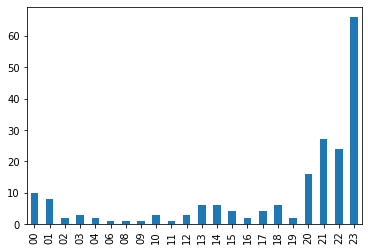

In [58]:
df['submit_hour'].value_counts().sort_index().plot.bar()